Welcome to the Guided Project for the Logistic Regression Modeling in Python course! We have learned a lot about logistic regression and classification in the past four lessons, and it's about time that we use this knowledge on a real-world dataset.

As with the linear regression guided project, we'll also be looking at a real-life dataset: the [Heart Disease Data Set](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) from the UCI Machine Learning Repository. This dataset comes from the famous Cleveland Clinic Foundation, which recorded information on various patient characteristics, including age and chest pain, to try to classify the presence of heart disease in an individual. This a prime example of how machine learning can help solve problems that have a real impact on people's lives.

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix



heart = pd.read_csv('heart_disease.csv')

In [5]:
heart.head

<bound method NDFrame.head of      Unnamed: 0  age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  \
0             1   63    1   1       145   233    1        2      150      0   
1             2   67    1   4       160   286    0        2      108      1   
2             3   67    1   4       120   229    0        2      129      1   
3             4   37    1   3       130   250    0        0      187      0   
4             5   41    0   2       130   204    0        2      172      0   
..          ...  ...  ...  ..       ...   ...  ...      ...      ...    ...   
298         299   45    1   1       110   264    0        0      132      0   
299         300   68    1   4       144   193    1        0      141      0   
300         301   57    1   4       130   131    0        0      115      1   
301         302   57    0   2       130   236    0        2      174      0   
302         303   38    1   3       138   175    0        0      173      0   

     oldpeak  slope  

# Exploring the Dataset

In [6]:
# Columns in Data Set

heart.columns

Index(['Unnamed: 0', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'present'],
      dtype='object')

**Present** is the only column with binary values
   0 indicates no heart disease 
   1 indicates presence of disease

array([[<AxesSubplot:title={'center':'present'}>]], dtype=object)

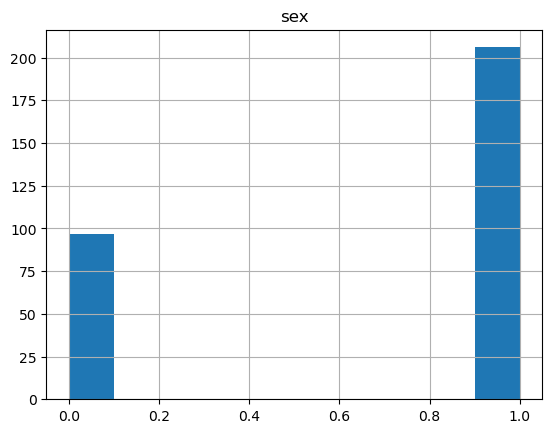

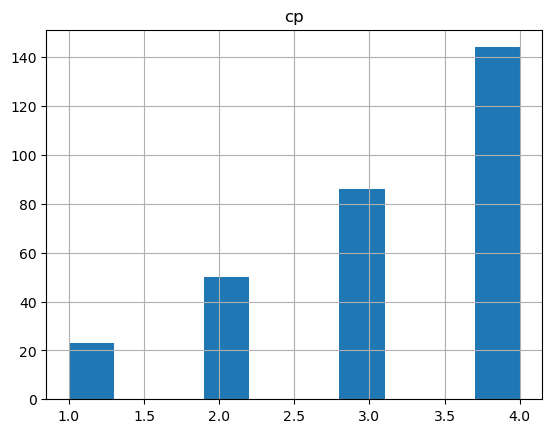

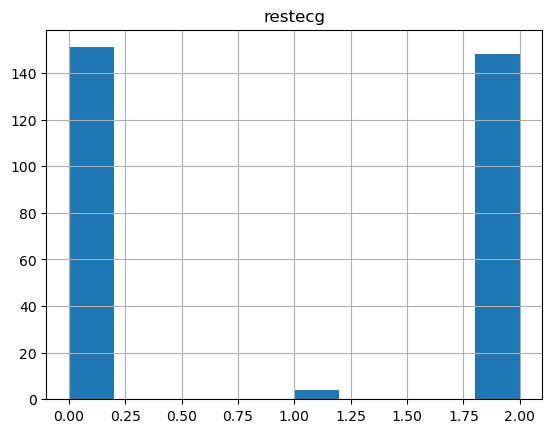

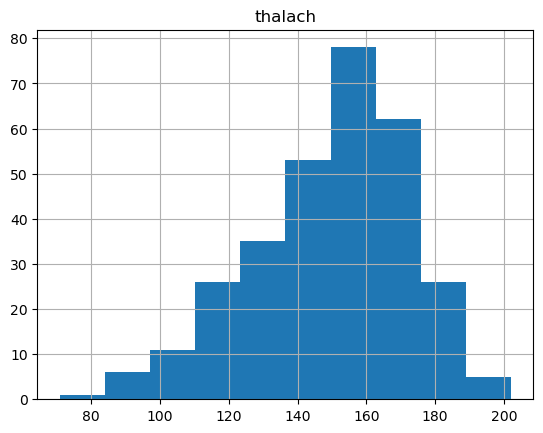

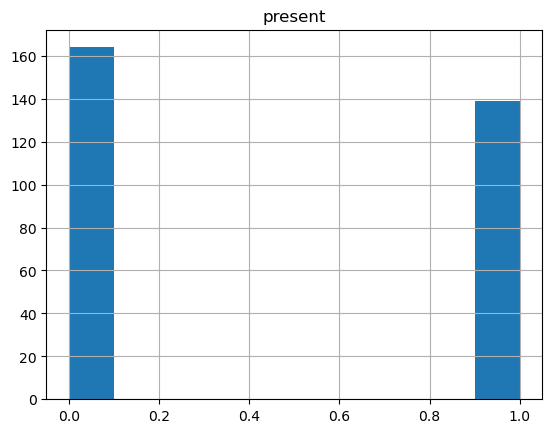

In [11]:
# Histogram

heart.hist('sex')
heart.hist('cp')
heart.hist('restecg')
heart.hist('thalach')
heart.hist('present')

<AxesSubplot:>

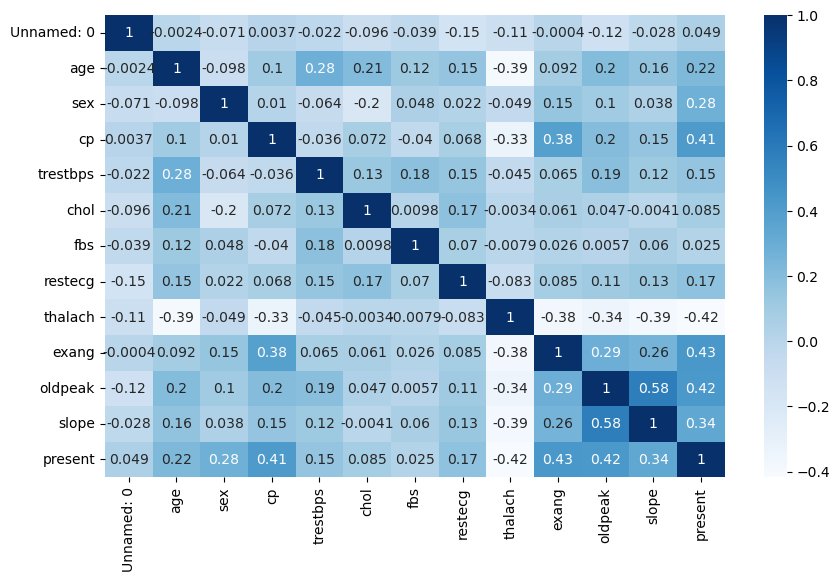

In [12]:
heartcorr = heart.corr()
plt.figure(figsize=(10,6))
sns.heatmap(heartcorr,annot=True,cmap='Blues')

In [23]:
# Checking for Potential Predictors

heart.groupby("present").agg(
    {
        "age": "mean",
        "sex": "mean",
        "cp": "mean",
        "trestbps": "mean",
        "chol": "mean",
        "fbs":"mean",
        "thalach":"mean",
        "restecg":"mean"
    }
)


,age,sex,cp,trestbps,chol,fbs,thalach,restecg
present,,,,,,,,
0,52.585366,0.560976,2.792683,129.250000,242.640244,0.140244,158.378049,0.835366
1,56.625899,0.820144,3.589928,134.568345,251.474820,0.158273,139.258993,1.172662


Some columns have a small, but noticeable difference when stratified by predictors. Based on the differences and some knowledge about heart disease, these seem like good candidates for predictors:

 - age
 - thalach (maximum heart rate achieved)
 - restecg (resting ECG)
 - ca (number of vessels colored by fluoroscopy)
 
 
# Dividing the Data

Using 70 : 30 split

In [62]:
#heart['ca'].astype('np.int64')
heart.info()
X = heart[["age","thalach","restecg","cp"]]
y = heart['present']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    int64  
 3   cp          303 non-null    int64  
 4   trestbps    303 non-null    int64  
 5   chol        303 non-null    int64  
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     303 non-null    int64  
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    object 
 13  thal        303 non-null    object 
 14  present     303 non-null    int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 35.6+ KB


In [68]:
# Checking for separation in the datasets
# Check that both the training and test datasets have cases and non-cases. 
#If not, then select a new seed until this is the case.
print("Y_train: ", sum(y_train == 0))
print("Y_train: ", sum(y_train == 1))
print("Y_test: ", sum(y_test == 0))
print("Y_test: ", sum(y_test == 1))


Y_train:  115
Y_train:  97
Y_test:  49
Y_test:  42


#  Building the Model


In [55]:
# Construct Logistic Regression Model

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [65]:
## Accuracy

accuracy = model.score(X_train,y_train)
print(accuracy)

0.7358490566037735


In [69]:
## Predictions
predictions = model.predict(X_train)

tp = sum ((predictions==1) & (y_train == 1))
fn = sum ((predictions==0) & (y_train == 1))
sensitivity = tp / (tp + fn)

tn = sum ((predictions == 0 ) & (y_train == 0))
fp = sum ((predictions == 1 ) & (y_train == 0))

specificity = tn / (fp+tn)

print("Training Accuracy     : " , accuracy)
print("Training Sensitity    : " , sensitivity)
print("Training Specificity  : " , specificity)



Training Accuracy     :  0.7358490566037735
Training Sensitity    :  0.711340206185567
Training Specificity  :  0.7565217391304347


Overall the training accuracy was about 75%, the sensitivity was 71%, and the specificity was 75%. Based on these metrics, the model seems to perform better for non-cases.

# Interpreting the Model Coefficients


In [70]:
coefs = ["age", "thalach", "restecg", "cp"]

# Checking in terms of log-odds
for coef, val  in zip(coefs, model.coef_[0]):
    print(coef, ":", round(val, 2))

age : 0.02
thalach : -0.03
restecg : 0.26
cp : 0.78


In [71]:
# Checking in terms of odds
for coef, val  in zip(coefs, model.coef_[0]):
    print(coef, ":", round(np.exp(val), 2))


age : 1.02
thalach : 0.97
restecg : 1.3
cp : 2.17


- Higher age and maximum heart rate (thalach) is associated with lower odds of heart disease holding the other predictors constant, but both of these odds ratios are close to 1.
 - Resting ECG and the number of colored vessels are associated with higher odds of heart disease holding the other predictors constant. These increases seem to be moderate and high, respectively (a 47% increase and 225% (!) increase).
 
 
 # Final Model Evaluation


In [72]:
# Checking the various metrics for the model (test set)
acc = model.score(X_test, y_test)

predictions = model.predict(X_test)
tp = sum((predictions == 1) & (y_test == 1))
fp = sum((predictions == 1) & (y_test == 0))
tn = sum((predictions == 0) & (y_test == 0))
fn = sum((predictions == 0) & (y_test == 1))
sens = tp / (tp + fn)
spec = tn / (tn + fp)

print("Test Accuracy: ", acc)
print("Test Sensitivity: ", sens)
print("Test Specificity: ", spec)

Test Accuracy:  0.8241758241758241
Test Sensitivity:  0.7857142857142857
Test Specificity:  0.8571428571428571


# Drawing Conclusions

Test accuracy was 82%, sensitivity was 79%, and specificity was 85%. Compared to the training set, the accuracy did change much, while the model fared better with cases and also fared better with non-cases. This is potentially useful since this application is health-based. We might be more interested in being better at identifying cases than non-cases.
